## _Hacking PageRank_

En esta Notebook hacemos varios experimentos teniendo como objetivo encontrar el *precio* de tener mucha importancia en PageRank.

#### Primer Exp: _Cuantos sitios dummy_

Aquí veremos, de forma simple, cuantos sitios (nodos) dummy, con links a un sitio especial H, debemos agregar para que la importancia de H aumente, comenzando con que H no tiene ningún sitio apuntandolo.

#### Segundo Exp: _Estrella Vs Completo_

En este experimento comenzamos con un nodo H, y queremos agregar M nodos dummy que apunten hacia él, con el objetivo de mejorar su importancia. La pregunta es si conviene interconectar los M nodos entre si (aumentando la importancia de cada uno) o conviene dejarlos aíslados.

In [1]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
import networkx as nx

In [2]:
from exp_base import *
from generador_grafos import *
from grafos_utils import *

In [3]:
matriz_fija = generar_grafo_random_m_fijo(1000, 5000)

In [4]:
df = pd.DataFrame(columns = ['p', 'm', 'val', 'val_dummy', 'grafo'])

for m in range(0, 1001, 100):
    print('m: {}'.format(m))
    grafo_a_agregar = generar_grafo_trivial(m+1) # el nodo m+1 es el especial
    for x in range(0, m):
        grafo_a_agregar[x][m] = 1
    for p in [0.05 + 0.1*i for i in range(0, 10)]:
        guardar_matriz_en_archivo(generar_grafo_union([matriz_fija, grafo_a_agregar]), 'hack_mtx.txt')
        out = ejecutar_con_args(['-o -', 'hack_mtx.txt', p])
        out = parsear_output(out)
        sum = 0.0
        for x in range(0, m):
            sum += float(out[1][1000+x])
        df.loc[len(df)] = [p, m, float(out[1][1000+m]), sum, grafo_a_agregar]
    

m: 0
m: 100
m: 200
m: 300
m: 400
m: 500
m: 600
m: 700
m: 800
m: 900
m: 1000


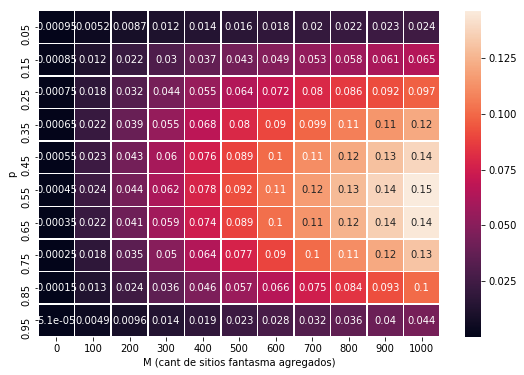

In [5]:
dfval = df.pivot('p', 'm', 'val')
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(dfval, annot=True, linewidths=.5, ax=ax)
# ax.set_title('Hackeando PageRank: grafo estrella')
ax.set_ylabel('p')
ax.set_xlabel('M (cant de sitios fantasma agregados)')
f.savefig('img/hackestrella.png')

In [52]:
# imprimir(generar_grafo_union([matriz_fija, df[]]))
0.05+8*0.1

0.8500000000000001

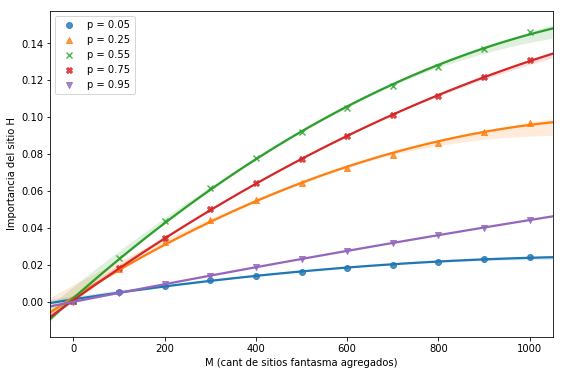

In [71]:
dffloat = df[['m', 'p', 'val']].astype(float)
# dffloat
f, ax = plt.subplots(figsize=(9, 6))
for i,m in [(0,'o'),(2,'^'),(5,'x'),(7,'X'),(9,'v')]:
    sns.regplot(ax=ax, marker=m, x='m', y='val', data=dffloat[dffloat.p == 0.05 + 0.1*i], order=2, label = 'p = 0.{}5'.format(i))
# sns.regplot(ax=ax, x='m', y='val', data=dffloat[dffloat.p == 0.55], order=2, label = 'p = 0.55')
# sns.regplot(ax=ax, x='m', y='val', data=dffloat[dffloat.p == 0.05 + 0.1*8], order=2, label = 'p = 0.85')
ax.set_ylabel('Importancia del sitio H')
ax.set_xlabel('M (cant de sitios fantasma agregados)')
ax.legend()
f.savefig('img/hackestrellapfijo.png')
# imprimir(df[df.p == 0.55][df.m==100].grafo)

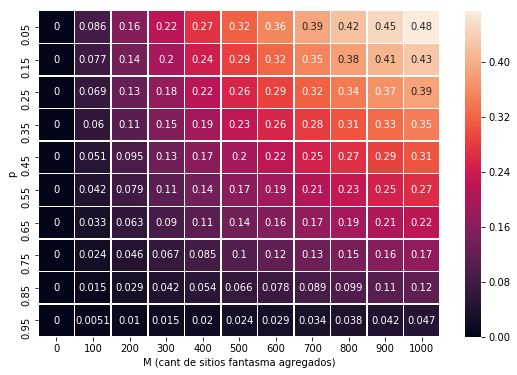

In [6]:
dfval = df.pivot('p', 'm', 'val_dummy')
dfval = dfval[dfval.columns].astype(float)

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(dfval, annot=True, linewidths=.5, ax=ax)
ax.set_ylabel('p')
ax.set_xlabel('M (cant de sitios fantasma agregados)')
f.savefig('img/hackestrelladummys.png')

In [19]:
matriz_fija = generar_grafo_random_m_fijo(1000, 5000)

In [21]:
m = 360
df = pd.DataFrame(columns = ['d', 'p', 'grafo', 'val', 'val_dummy'])

for p in [0.05 + 0.1*i for i in range(0, 10)]:
    print('p: {}'.format(p))
    grafo_a_agregar = generar_grafo_trivial(m+1) # el nodo m es el especial
    for x in range(0, m):
        grafo_a_agregar[x][m] = 1
    for d in range(0, 30, 2):
        print('d: {}'.format(d))
        if d:
            for dif in range(d-1, d+1):
                for x in range(0, m):
                    grafo_a_agregar[x][(x+dif)%m] = 1
        guardar_matriz_en_archivo(generar_grafo_union([matriz_fija, grafo_a_agregar]), 'hack_mtx.txt')
        out = ejecutar_con_args(['-o -', 'hack_mtx.txt', p])
        out = parsear_output(out)
        sum = 0.0
        for x in range(0, m):
            sum += float(out[1][1000+x])
        df.loc[len(df)] = [d, p, grafo_a_agregar.copy(), float(out[1][1000+m]), sum]


p: 0.05
d: 0
d: 2
d: 4
d: 6
d: 8
d: 10
d: 12
d: 14
d: 16
d: 18
d: 20
d: 22
d: 24
d: 26
d: 28
p: 0.15000000000000002
d: 0
d: 2
d: 4
d: 6
d: 8
d: 10
d: 12
d: 14
d: 16
d: 18
d: 20
d: 22
d: 24
d: 26
d: 28
p: 0.25
d: 0
d: 2
d: 4
d: 6
d: 8
d: 10
d: 12
d: 14
d: 16
d: 18
d: 20
d: 22
d: 24
d: 26
d: 28
p: 0.35000000000000003
d: 0
d: 2
d: 4
d: 6
d: 8
d: 10
d: 12
d: 14
d: 16
d: 18
d: 20
d: 22
d: 24
d: 26
d: 28
p: 0.45
d: 0
d: 2
d: 4
d: 6
d: 8
d: 10
d: 12
d: 14
d: 16
d: 18
d: 20
d: 22
d: 24
d: 26
d: 28
p: 0.55
d: 0
d: 2
d: 4
d: 6
d: 8
d: 10
d: 12
d: 14
d: 16
d: 18
d: 20
d: 22
d: 24
d: 26
d: 28
p: 0.6500000000000001
d: 0
d: 2
d: 4
d: 6
d: 8
d: 10
d: 12
d: 14
d: 16
d: 18
d: 20
d: 22
d: 24
d: 26
d: 28
p: 0.7500000000000001
d: 0
d: 2
d: 4
d: 6
d: 8
d: 10
d: 12
d: 14
d: 16
d: 18
d: 20
d: 22
d: 24
d: 26
d: 28
p: 0.8500000000000001
d: 0
d: 2
d: 4
d: 6
d: 8
d: 10
d: 12
d: 14
d: 16
d: 18
d: 20
d: 22
d: 24
d: 26
d: 28
p: 0.9500000000000001
d: 0
d: 2
d: 4
d: 6
d: 8
d: 10
d: 12
d: 14
d: 16
d: 18
d: 20
d: 22
d:

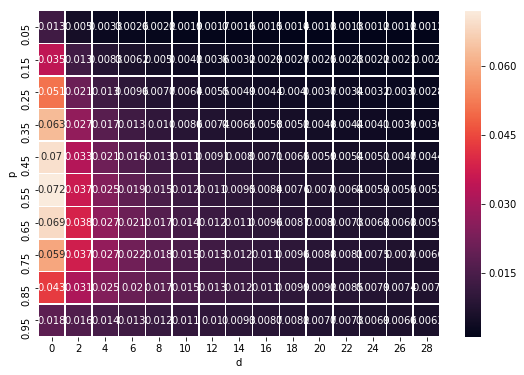

In [22]:
dfval = df.pivot('p', 'd', 'val')
dfval = dfval[dfval.columns].astype(float)

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(dfval, annot=True, linewidths=.5, ax=ax)

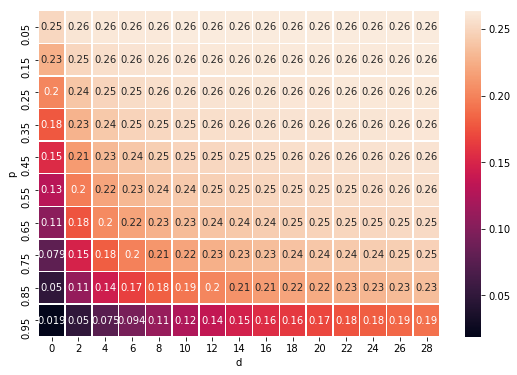

In [23]:
dfval = df.pivot('p', 'd', 'val_dummy')
dfval = dfval[dfval.columns].astype(float)

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(dfval, annot=True, linewidths=.5, ax=ax)

In [64]:
# m es el numero de nodos que agregamos, d la proporcion del grado de cada m
# d[i] = d*m
ms = [i for i in range(10, 400, 20)]
ds = [i for i in range(1, 11)]
grafos = {}
importancia = {10:{}}
df = pd.DataFrame(columns = ['m', 'd', 'val'])


for m in ms:
    print('m: {}'.format(m))
    for d in ds:
        matriz_agregada = generar_grafo_trivial(1)
        #di = int((d/20.0)*m)
        di = float(m)**(float(1.0/d))
        print(d)
        print('di: {}'.format(di))
        di = int(round(di))
        quedan = m
        
        nodosAAgregar = [0]
        while quedan and nodosAAgregar:
            objetivo = nodosAAgregar[0]
            nodosAAgregar = nodosAAgregar[1:]
            nodosAAgregar += [i+len(matriz_agregada) for i in range(min(quedan, di))]
            
            matriz_agregada = agregar_grafo_estrella_hacia_adentro(matriz_agregada, min(quedan, di), len(matriz_agregada), objetivo)
            quedan = max(0, quedan-di)
        grafos[(m, d)] = matriz_agregada
        guardar_matriz_en_archivo(generar_grafo_union([matriz_fija, matriz_agregada]), 'hack_mtx.txt')
        out = ejecutar_con_args(['-o -', 'hack_mtx.txt', 0.8])
#         print(out)
        out = parsear_output(out)
#         importancia[m][d] = out[1][200]
        df.loc[len(df)] = [m, d, out[1][400]]
        print (out[1][400])
        
        

m: 10
1
di: 10.0
0.00706071
2
di: 3.1622776601683795
0.0061604
3
di: 2.154434690031884
0.00562323
4
di: 1.7782794100389228
0.00562323
5
di: 1.5848931924611136
0.00562323
6
di: 1.4677992676220695
0.00353651
7
di: 1.3894954943731377
0.00353651
8
di: 1.333521432163324
0.00353651
9
di: 1.2915496650148839
0.00353651
10
di: 1.2589254117941673
0.00353651
m: 30
1
di: 30.0
0.0190744
2
di: 5.477225575051661
0.0158292
3
di: 3.1072325059538586
0.0137426
4
di: 2.340347319320716
0.0117332
5
di: 1.97435048583482
0.0117332
6
di: 1.762734383267615
0.0117332
7
di: 1.6256135930564983
0.0117332
8
di: 1.5298193747370035
0.0117332
9
di: 1.4592328029610848
0.00359181
10
di: 1.405115826483646
0.00359181
m: 50
1
di: 50.0
0.0304457
2
di: 7.0710678118654755
0.0248294
3
di: 3.6840314986403864
0.0214164
4
di: 2.6591479484724942
0.0196256
5
di: 2.1867241478865562
0.0157354
6
di: 1.9193831036664843
0.0157354
7
di: 1.74867862159014
0.0157354
8
di: 1.6306894089533097
0.0157354
9
di: 1.5444521049463789
0.0157354
10
di:

In [65]:
df = df.pivot('m', 'd', 'val')

In [66]:
df

d,1,2,3,4,5,6,7,8,9,10
m,,,,,,,,,,
10,0.00706071,0.0061604,0.00562323,0.00562323,0.00562323,0.00353651,0.00353651,0.00353651,0.00353651,0.00353651
30,0.0190744,0.0158292,0.0137426,0.0117332,0.0117332,0.0117332,0.0117332,0.0117332,0.00359181,0.00359181
50,0.0304457,0.0248294,0.0214164,0.0196256,0.0157354,0.0157354,0.0157354,0.0157354,0.0157354,0.00335418
70,0.0412249,0.0331004,0.0276043,0.0243074,0.0189652,0.0189652,0.0189652,0.0189652,0.0189652,0.0189652
90,0.0514571,0.0408297,0.0328477,0.0285791,0.0213407,0.0213407,0.0213407,0.0213407,0.0213407,0.0213407
110,0.0611827,0.0480687,0.0396463,0.0324923,0.0324923,0.0234893,0.0234893,0.0234893,0.0234893,0.0234893
130,0.0704387,0.0548628,0.0445168,0.0355301,0.0355301,0.025309,0.025309,0.025309,0.025309,0.025309
150,0.0792581,0.0612516,0.0490452,0.0377812,0.0377812,0.0264574,0.0264574,0.0264574,0.0264574,0.0264574
170,0.0876711,0.0672704,0.0544533,0.046287,0.0398498,0.0275052,0.0275052,0.0275052,0.0275052,0.0275052


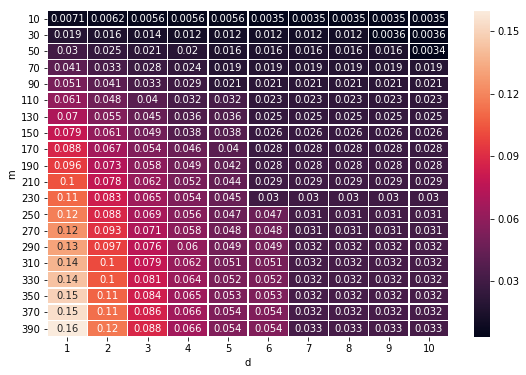

In [67]:
df = df[df.columns].astype(float)
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(df, annot=True, linewidths=.5, ax=ax)

/home/teo/.local/lib/python3.5/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


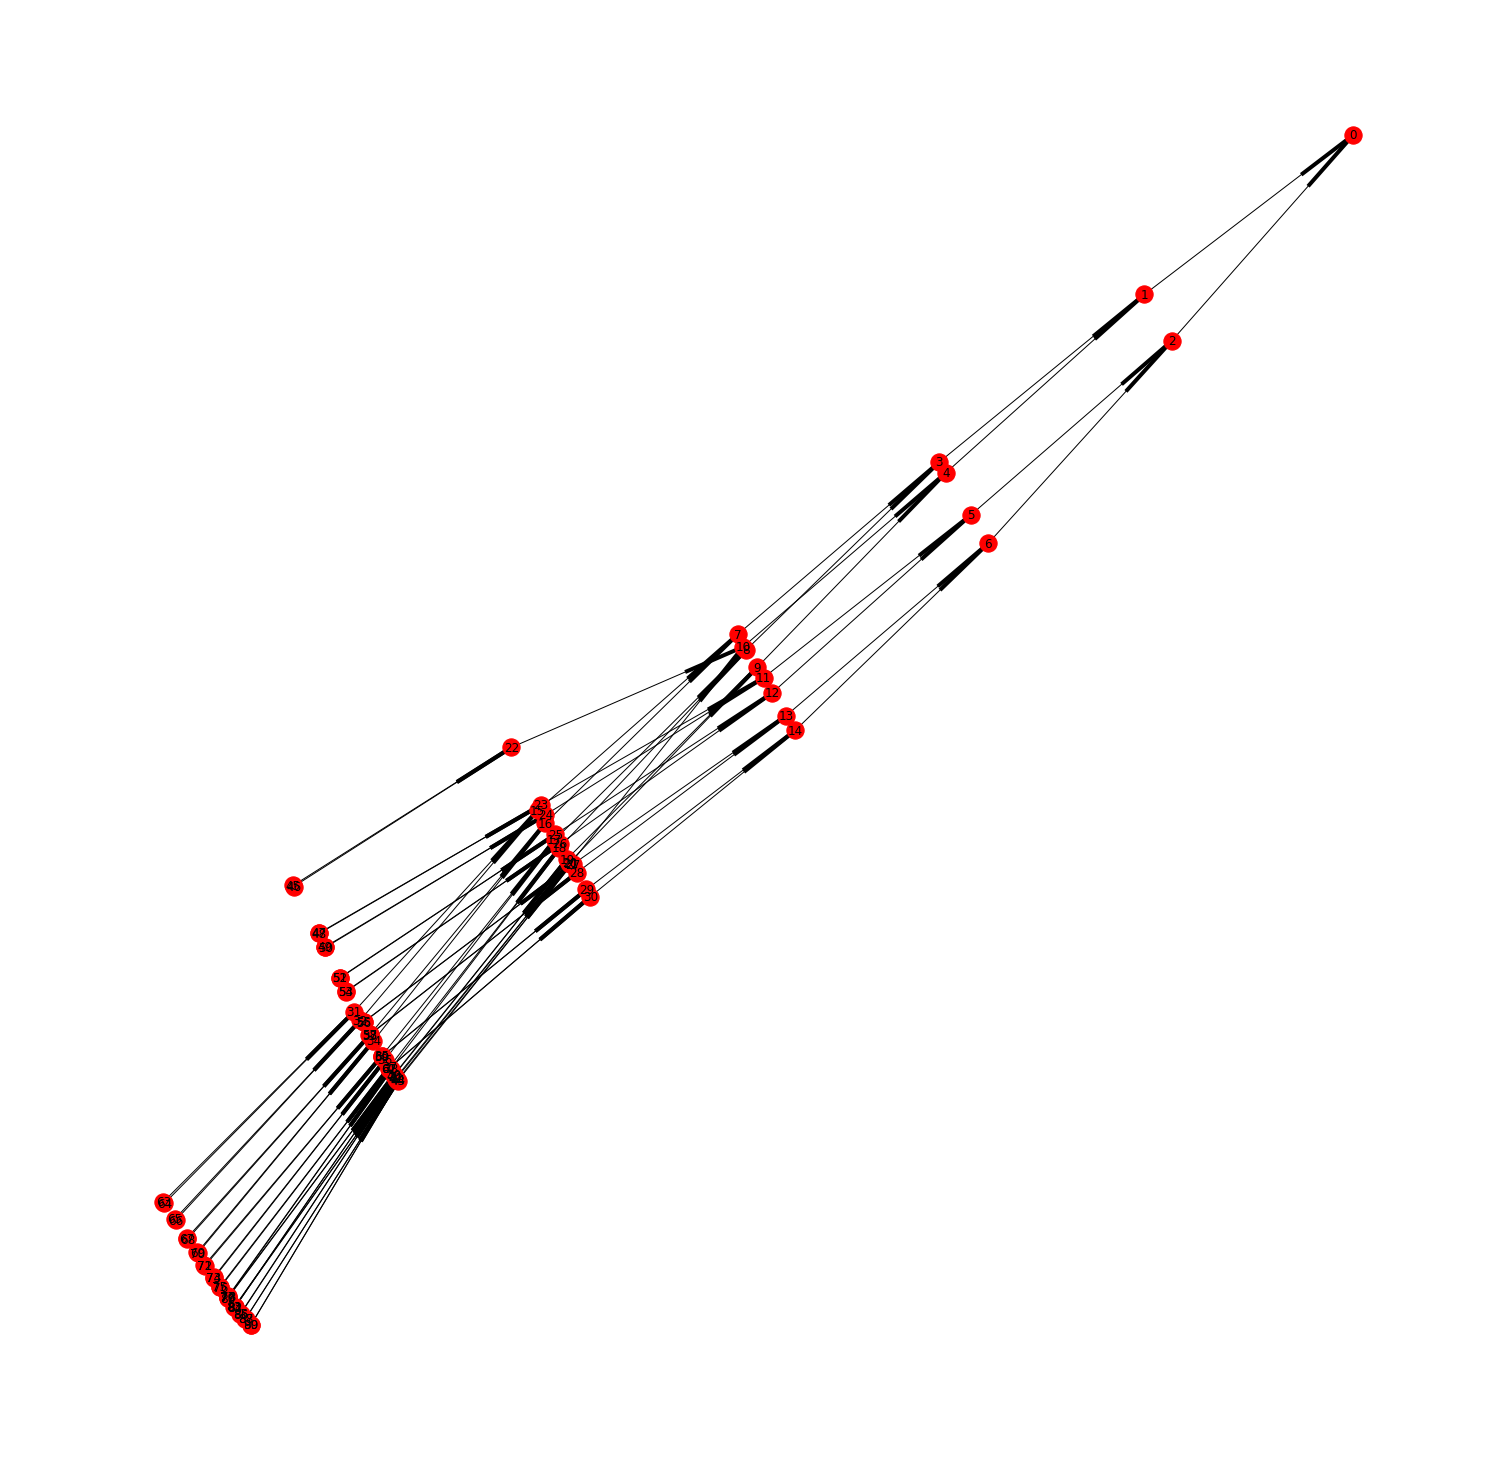

In [59]:
imprimir(grafos[(90, 8)])

In [10]:
extender_grafo(matriz_fija, 3000)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [14]:
len(matriz_fija[2030])

3000

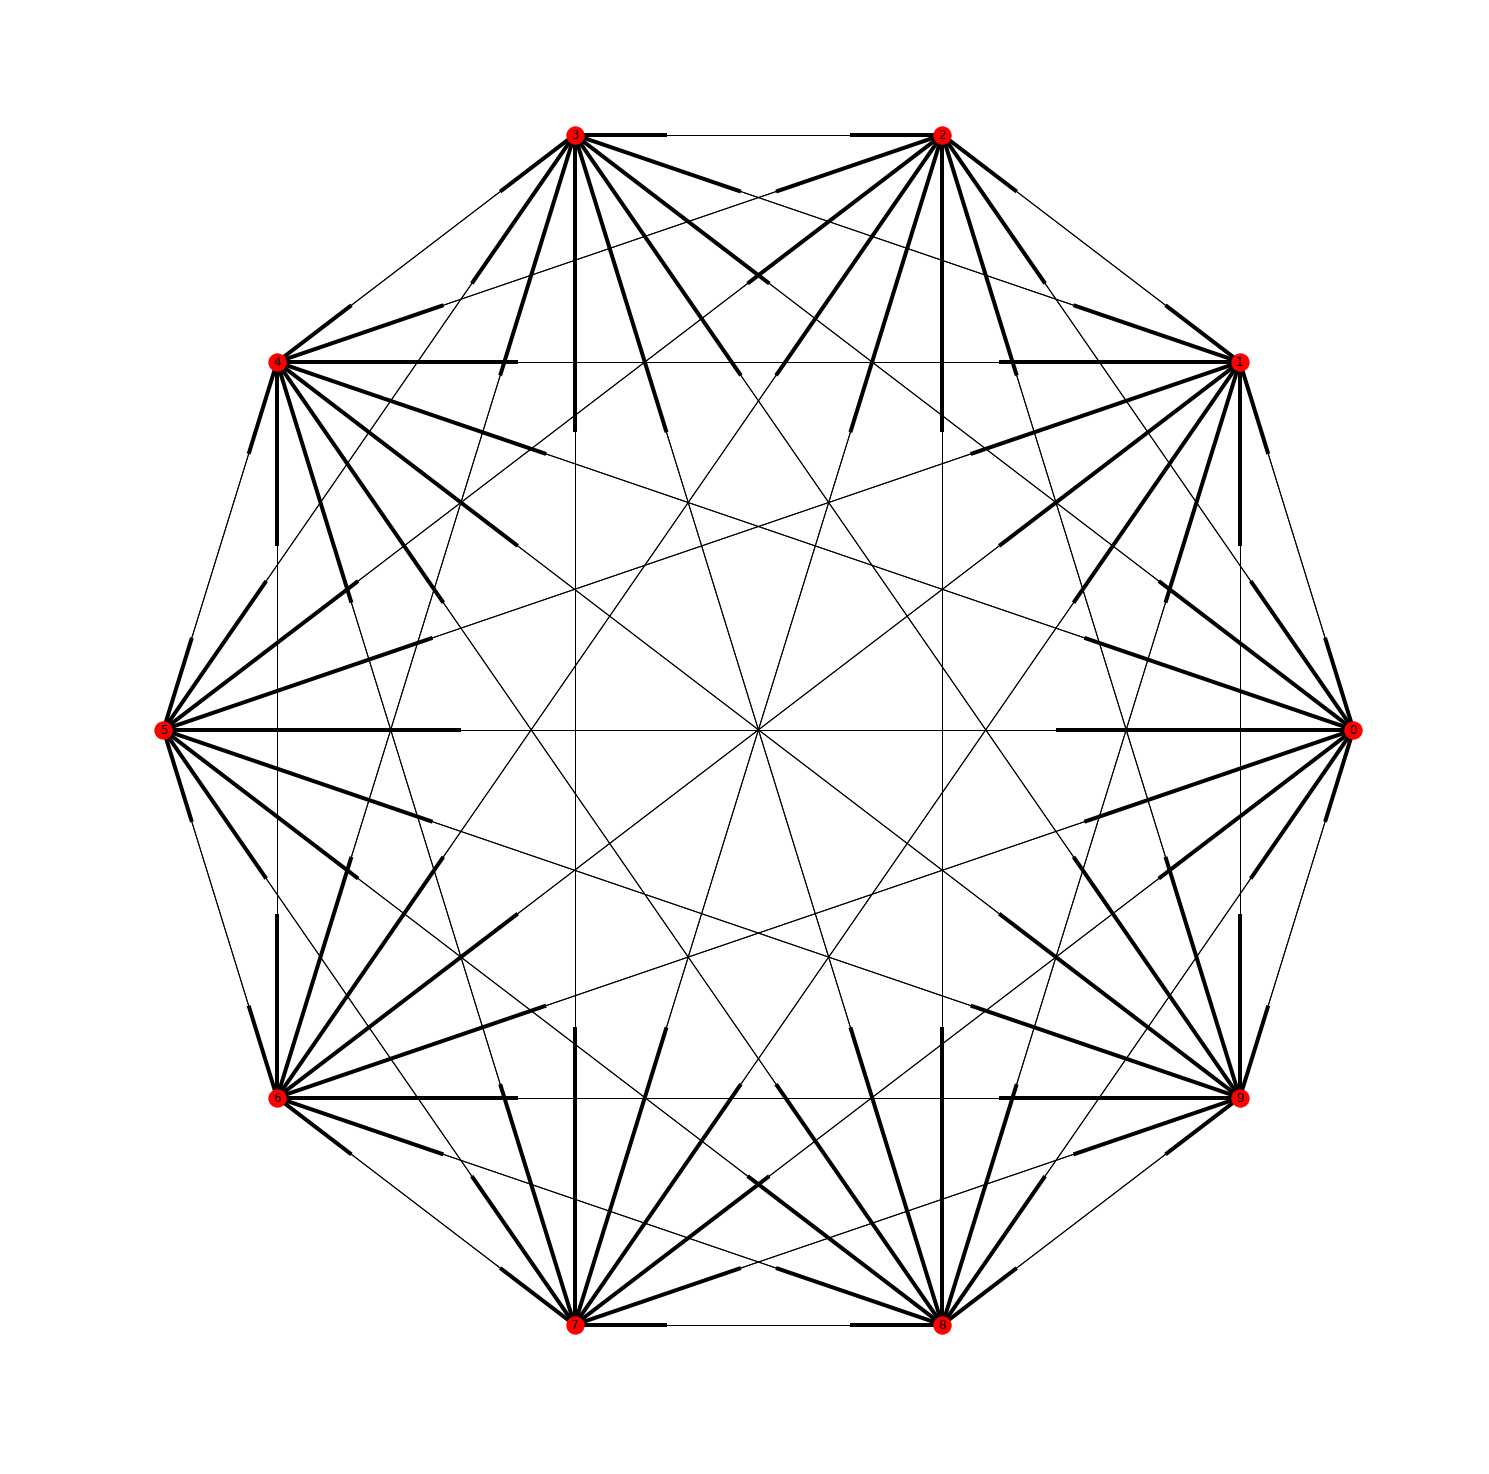

In [6]:
imprimir(generar_grafo_random_de_densidad(10 , 1), 'img/prueba.png')